In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
player_stats_per_game = pd.read_csv(filepath_or_buffer='final_data/player_stats_per_game.csv')
player_stats_per_game.head()

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name
0,2020-21,Miami Heat,PF,61.0,4.0,12.1,2.0,3.7,0.544,0.0,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,Precious Achiuwa
1,2021-22,Toronto Raptors,C,73.0,28.0,23.6,3.6,8.3,0.439,0.8,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,Precious Achiuwa
2,2022-23,Toronto Raptors,C,55.0,12.0,20.7,3.6,7.3,0.485,0.5,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,Precious Achiuwa
3,2023-24,Total,PF,74.0,18.0,21.9,3.2,6.3,0.501,0.4,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,Precious Achiuwa
4,2023-24,Toronto Raptors,C,25.0,0.0,17.5,3.1,6.8,0.459,0.5,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,Precious Achiuwa


In [3]:
player_stats_per_game['pos'] = player_stats_per_game['pos'].str[-1]
player_stats_per_game.head()

,season,team,pos,g,gs,mp,fg,fga,fg%,3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,name
0,2020-21,Miami Heat,F,61.0,4.0,12.1,2.0,3.7,0.544,0.0,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,Precious Achiuwa
1,2021-22,Toronto Raptors,C,73.0,28.0,23.6,3.6,8.3,0.439,0.8,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,Precious Achiuwa
2,2022-23,Toronto Raptors,C,55.0,12.0,20.7,3.6,7.3,0.485,0.5,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,Precious Achiuwa
3,2023-24,Total,F,74.0,18.0,21.9,3.2,6.3,0.501,0.4,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,Precious Achiuwa
4,2023-24,Toronto Raptors,C,25.0,0.0,17.5,3.1,6.8,0.459,0.5,...,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7,Precious Achiuwa


In [4]:
forwards = player_stats_per_game[player_stats_per_game['pos'] == 'F'].loc[:, ['fg%', 'ft%', '2p%', 'trb']]
forwards

,fg%,ft%,2p%,trb
0,0.544,0.509,0.546,3.4
3,0.501,0.616,0.562,6.6
5,0.525,0.643,0.578,7.2
6,0.457,0.500,0.486,7.0
20,0.557,0.691,0.564,10.2
...,...,...,...,...
4993,0.465,0.481,0.495,4.4
4994,0.545,0.692,0.622,3.1
4995,0.602,0.400,0.634,3.1
4996,0.621,0.417,0.654,3.3


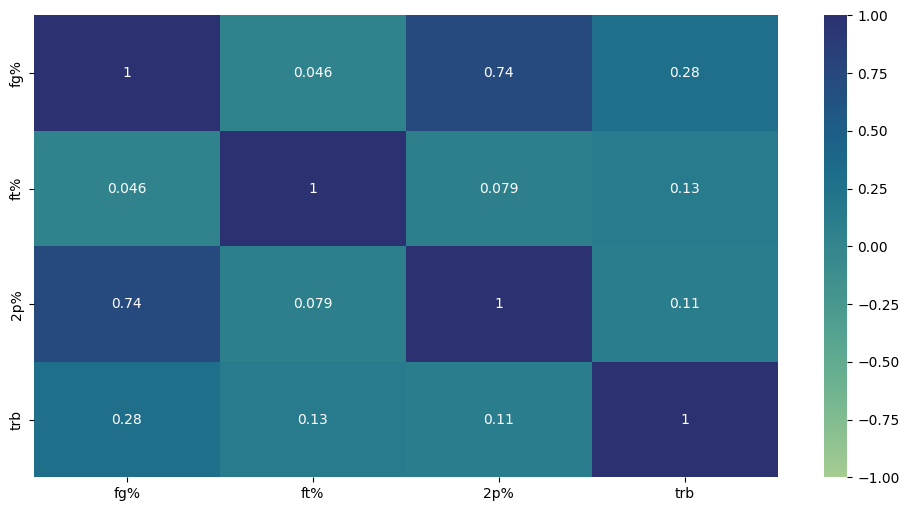

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=forwards.corr(), vmin=-1, vmax=1, cmap='crest', annot=True)
plt.show()

In [6]:
forwards.dropna(inplace=True)
forwards.isna().sum()

fg%    0
ft%    0
2p%    0
trb    0
dtype: int64

In [7]:
forwards_scaled = MinMaxScaler().fit_transform(forwards)
forwards_scaled

array([[0.544     , 0.24238095, 0.546     , 0.22368421],
       [0.501     , 0.29333333, 0.562     , 0.43421053],
       [0.525     , 0.30619048, 0.578     , 0.47368421],
       ...,
       [0.602     , 0.19047619, 0.634     , 0.20394737],
       [0.621     , 0.19857143, 0.654     , 0.21710526],
       [0.524     , 0.15857143, 0.55      , 0.18421053]], shape=(1815, 4))

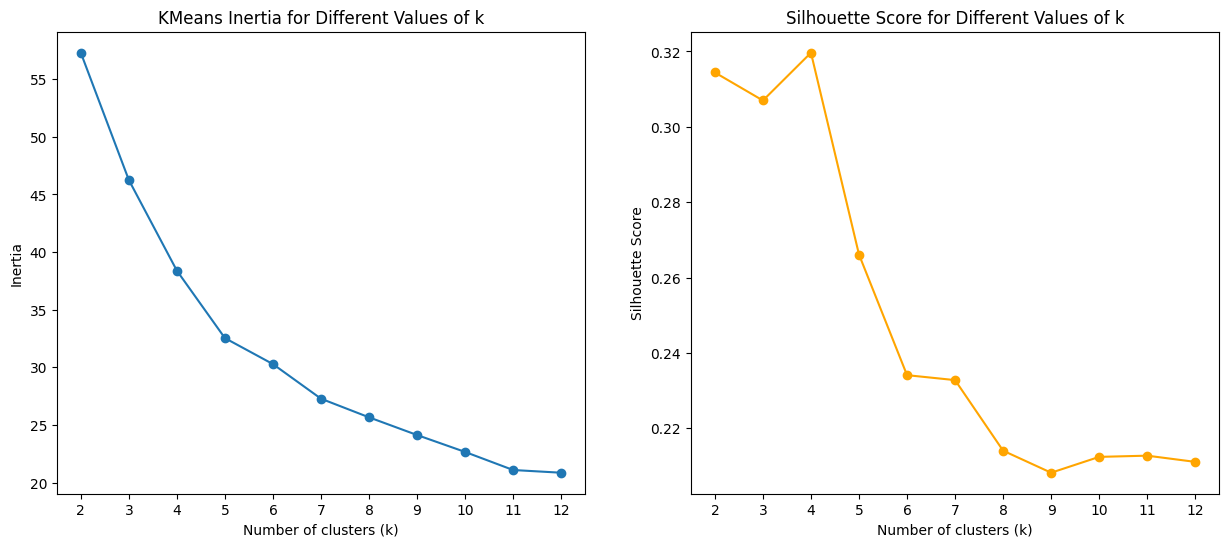

In [8]:
inertias = []
silhouette_scores = []
k_values = range(2, 13)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=1000)
    cluster_labels = kmeans.fit_predict(forwards_scaled)
    silhouette_scores.append(silhouette_score(forwards_scaled, cluster_labels))
    inertias.append(kmeans.inertia_)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes[0].plot(k_values, inertias, marker='o')
axes[0].set_title('KMeans Inertia for Different Values of k')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_xticks(ticks=k_values)

axes[1].plot(k_values, silhouette_scores, marker='o', color='orange')
axes[1].set_title('Silhouette Score for Different Values of k')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(ticks=k_values)

plt.show()

In [9]:
forward_kmeans = KMeans(n_clusters=4, random_state=0, max_iter=1000)
forward_cluster_labels = forward_kmeans.fit_predict(forwards_scaled)
forwards['cluster'] = forward_cluster_labels
forwards['cluster'].value_counts()

cluster
2    938
0    566
3    217
1     94
Name: count, dtype: int64

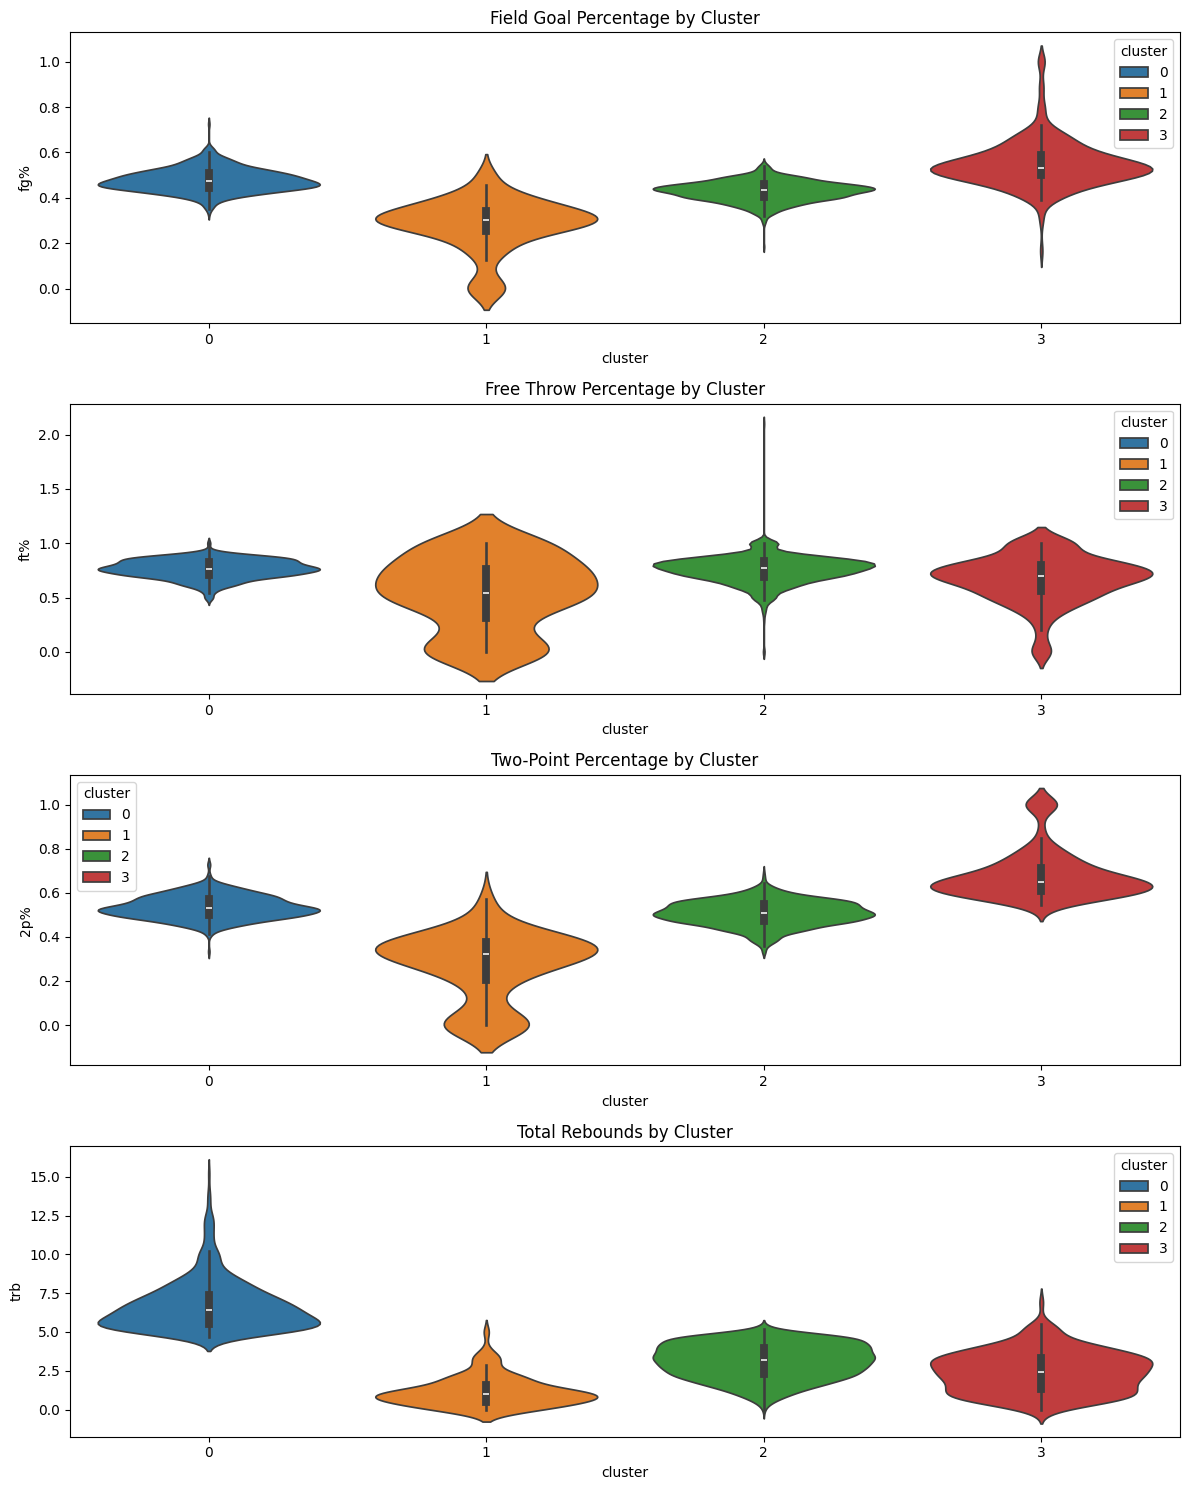

In [10]:
forward_cluster_colors = {0: '#1f77b4',  # Blue
                          1: '#ff7f0e',  # Orange
                          2: '#2ca02c',  # Green
                          3: '#d62728',  # Red
                          4: '#ffde59',  # Yellow
                          5: '#d84ba1'}  # Pink

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 15))

sns.violinplot(x=forwards['cluster'], y=forwards['fg%'], palette=forward_cluster_colors, hue=forwards['cluster'], ax=axes[0])
axes[0].set_title('Field Goal Percentage by Cluster')
axes[0].set_ylabel('fg%')

sns.violinplot(x=forwards['cluster'], y=forwards['ft%'], palette=forward_cluster_colors, hue=forwards['cluster'], ax=axes[1])
axes[1].set_title('Free Throw Percentage by Cluster')
axes[1].set_ylabel('ft%')

sns.violinplot(x=forwards['cluster'], y=forwards['2p%'], palette=forward_cluster_colors, hue=forwards['cluster'], ax=axes[2])
axes[2].set_title('Two-Point Percentage by Cluster')
axes[2].set_ylabel('2p%')

sns.violinplot(x=forwards['cluster'], y=forwards['trb'], palette=forward_cluster_colors, hue=forwards['cluster'], ax=axes[3])
axes[3].set_title('Total Rebounds by Cluster')
axes[3].set_ylabel('trb')

plt.tight_layout()
plt.show()